In [175]:
import tensorflow as tf

In [176]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, UpSampling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [177]:
(x_train,y_train), (x_test,y_test)=load_data()

In [178]:
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [179]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0,표준편차 scale=1.0,출력size=None)
x_train_noised = x_train + np.random.normal(0,0.5,size=x_train.shape)
x_test_noised = x_test + np.random.normal(0,0.5,size=x_test.shape)

x_train_noised = np.clip(x_train_noised,a_min=0,a_max=1)
x_test_noised = np.clip(x_test_noised,a_min=0,a_max=1)

In [196]:
def createCV(n_node):
    modelcv=Sequential()
    modelcv.add(Conv2D(n_node, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
    modelcv.add(MaxPooling2D())
    modelcv.add(Conv2D(n_node, kernel_size=3, activation='relu', padding='same'))
    modelcv.add(UpSampling2D())
    modelcv.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))    
    modelcv.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return modelcv

In [207]:
cvmodel = createCV(100)

In [208]:
cvmodel.fit(x_train_noised,x_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.1154 - accuracy: 0.8115
Epoch 2/10
1875/1875 [==============================] - 164s 88ms/step - loss: 0.1018 - accuracy: 0.8129
Epoch 3/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0993 - accuracy: 0.8131
Epoch 4/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0982 - accuracy: 0.8132
Epoch 5/10
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0976 - accuracy: 0.8133
Epoch 6/10
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0971 - accuracy: 0.8134
Epoch 7/10
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0969 - accuracy: 0.8134
Epoch 8/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0966 - accuracy: 0.8134
Epoch 9/10
1875/1875 [==============================] - 173s 93ms/step - loss: 0.0965 - accuracy: 0.8134
Epoch 10/10
1875/1875 [==============================] 

In [213]:
cvmodel.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 28, 28, 100)       1000      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 14, 14, 100)       90100     
                                                                 
 up_sampling2d_16 (UpSamplin  (None, 28, 28, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 28, 28, 1)         901       
                                                                 
Total params: 92,001
Trainable params: 92,001
Non-tra

In [214]:
pre = cvmodel.predict(x_train_noised[4].reshape(-1,28,28,1))
pre_test = cvmodel.predict(x_test_noised[4].reshape(-1,28,28,1))

1/1 [==============================] - 0s 67ms/step


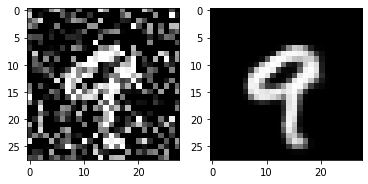

In [215]:
plt.subplot(1,2,1)
plt.imshow(x_train_noised[4].reshape(28,28), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pre.reshape(28,28), cmap='gray')
plt.show()

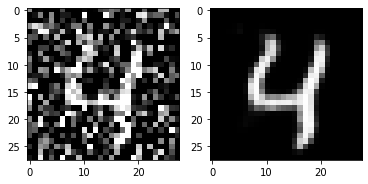

In [216]:
plt.subplot(1,2,1)
plt.imshow(x_test_noised[4].reshape(28,28), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pre_test.reshape(28,28), cmap='gray')
plt.show()